In [3]:
from pymongo import mongo_client
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re

In [4]:
url = 'mongodb://192.168.0.138:27017'
mgclient = mongo_client.MongoClient(url)

In [5]:
db = mgclient["restaurants"]
col1 = db["link_list"]
col2 = db["res_list"]
col3 = db["info_list"]
col4 = db["menu_list"]
col5 = db["review_info_list"]
col6 = db["review_list"]

In [6]:
def return_name_list():
    # 데이터 체크 및 리스트화
    name = []
    name_len = []
    for data in col2.find():
        for k, v in data.items():
            if k == "name":
                name.append(v)
                name_len.append(len(v))
            
    # 리스트 초기화
    namelist = []
    
    # 영어제외 12글자 이상 식당 이름 리스트화
    reg = re.compile(r'[a-zA-Z]')
    for x in range(0, len(name)):
        if name_len[x] >= 12:
            if reg.findall(name[x]):
                pass
            else:
                if name[x].find("휴업중") != -1:
                    pass
                else:
                    namelist.append(str(len(name[x]))+","+name[x])
    # 내림차순 정렬
    namelist.sort(reverse=True)
    
    # 오름차순 정렬
    namelist2 = []
    # 이름, 길이 리스트 추가
    for x in range(0, 5):
        namelist2.append(namelist[x])
        
    namelist2.sort()
    # 이름, 길이 리스트 초기화
    nlist = []
    lenlist = []
    for x in range(0, 5):
        nlist.append(namelist2[x].split(",")[1])
        lenlist.append(int(namelist2[x].split(",")[0]))
    return nlist, lenlist

In [7]:
nlist, lenlist = return_name_list()

In [8]:
print(nlist)
print(lenlist)

['대관령메밀막국수자연샤브샤브', '한라산아래첫마을영농조합법인', '비플레이트 바이 브라운브레드', '부부요리단1탄 제주흑돼지갑오징어', '플레이그라운드 브루어리 탭룸 송도']
[14, 14, 15, 17, 18]


In [9]:
from matplotlib import rc
from matplotlib import font_manager

f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic', size=10)

In [10]:
y = np.arange(5)

In [11]:
xlist = [0, 5, 10, 15, 20]

In [20]:
colors = ['red', 'orange', 'purple', 'blue', 'green']

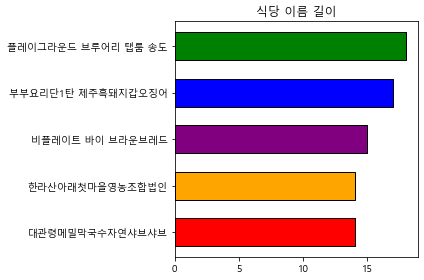

In [21]:
plt.yticks(y, nlist)
plt.xticks(xlist)
plt.barh(y, lenlist, height=0.6, color=colors, edgecolor='black')
plt.title("식당 이름 길이")
plt.tight_layout()
plt.savefig('resname.png', dpi=300, facecolor="#FFFFFF")

In [129]:
plt.show()

<Figure size 432x288 with 0 Axes>